In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
url='https://raw.githubusercontent.com/Rohit-28/Project-IIML/master/NSE-HDFCBANK.csv'

In [47]:
data=pd.read_csv(url,error_bad_lines=False)

In [25]:
data.shape

(5159, 8)

In [48]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-11-29,2101.00,2137.4,2094.00,2132.25,2131.05,7977159.0,168778.30
1,2018-11-28,2065.00,2098.6,2060.10,2091.00,2089.25,3255277.0,67937.87
2,2018-11-27,2041.05,2067.9,2040.75,2064.00,2064.00,3223860.0,66302.38
3,2018-11-26,2013.90,2052.0,2012.05,2050.00,2049.80,4546109.0,92740.60
4,2018-11-22,2013.25,2035.0,2000.15,2006.25,2005.50,3243638.0,65621.06


In [27]:
from IPython.display import display
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [31]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

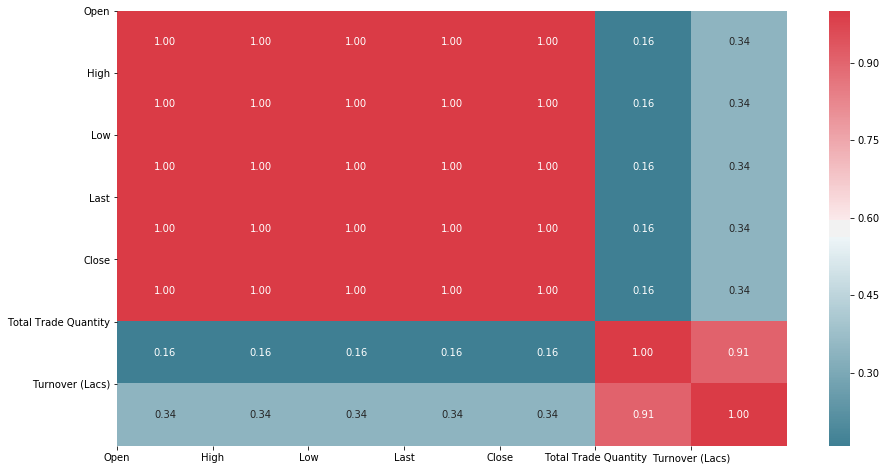

In [49]:
corr=data.corr()
fig,ax=plt.subplots(figsize=(15,8))
colormap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,cmap=colormap,annot=True,fmt='.2f')
plt.xticks(range(len(corr.columns)),corr.columns)
plt.yticks(range(len(corr.columns)),corr.columns)
plt.show()

In [50]:
data.drop(['Date','Total Trade Quantity','Turnover (Lacs)'],axis=1,inplace=True)

In [51]:
data.columns

Index(['Open', 'High', 'Low', 'Last', 'Close'], dtype='object')

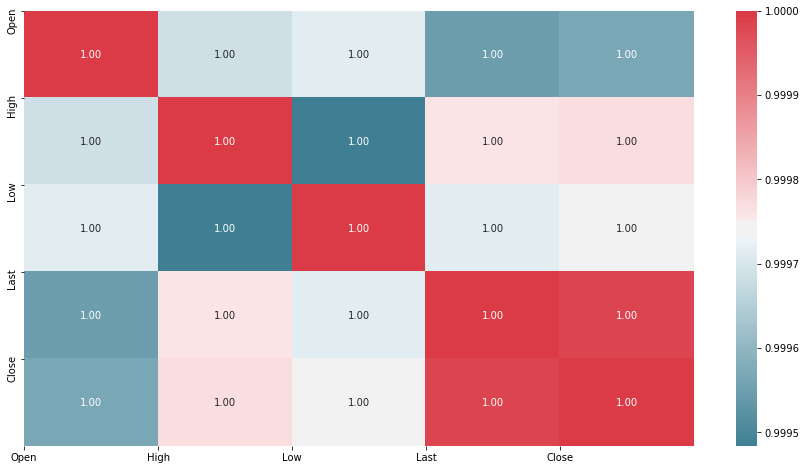

In [52]:
corr=data.corr()
fig,ax=plt.subplots(figsize=(15,8))
colormap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,cmap=colormap,annot=True,fmt='.2f')
plt.xticks(range(len(corr.columns)),corr.columns)
plt.yticks(range(len(corr.columns)),corr.columns)
plt.show()

In [53]:
data.corr()

,Open,High,Low,Last,Close
Open,1.000000,0.999687,0.999712,0.999550,0.999567
High,0.999687,1.000000,0.999484,0.999761,0.999770
Low,0.999712,0.999484,1.000000,0.999713,0.999735
Last,0.999550,0.999761,0.999713,1.000000,0.999984
Close,0.999567,0.999770,0.999735,0.999984,1.000000


In [54]:
data.describe()

,Open,High,Low,Last,Close
count,5159.000000,5159.000000,5159.000000,5158.000000,5158.000000
mean,861.843536,873.114228,849.790173,862.034102,862.052007
std,635.931147,642.878005,629.175668,636.345331,636.328271
min,49.150000,50.000000,48.000000,48.850000,49.000000
25%,260.400000,267.300000,255.000000,260.637500,261.150000
50%,698.000000,705.000000,687.000000,697.100000,696.725000
75%,1232.000000,1246.175000,1209.600000,1230.237500,1230.275000
max,2566.000000,2583.300000,2553.700000,2563.000000,2565.800000


In [60]:
data.isnull().values.any()

True

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5159 entries, 0 to 5158
Data columns (total 5 columns):
Open     5159 non-null float64
High     5159 non-null float64
Low      5159 non-null float64
Last     5158 non-null float64
Close    5158 non-null float64
dtypes: float64(5)
memory usage: 201.6 KB


In [66]:
data.fillna({'Last':data['Last'].mean(),'Close':data['Close'].mean()},inplace=True)

In [68]:
from sklearn.model_selection import train_test_split

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5159 entries, 0 to 5158
Data columns (total 5 columns):
Open     5159 non-null float64
High     5159 non-null float64
Low      5159 non-null float64
Last     5159 non-null float64
Close    5159 non-null float64
dtypes: float64(5)
memory usage: 201.6 KB


In [69]:
X_train,X_test,Y_train,Y_test=train_test_split(data.drop('Close',axis=1),data['Close'],test_size=0.3,random_state=112)

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
model=LinearRegression(normalize=True)

In [72]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [73]:
pred=model.predict(X_test)

In [78]:
pd.DataFrame({'Actual values':Y_test,'Prediction':pred}).sample(10)

,Actual values,Prediction
2676,1547.40,1551.579896
4390,225.40,225.840108
3282,631.85,631.551798
1629,542.50,542.806338
3687,365.60,365.343451
785,1049.20,1050.466097
1843,2325.55,2327.835668
1488,663.70,664.840108
1866,2273.80,2276.363189
2662,1474.30,1463.502668


In [75]:
model.score(X_test,Y_test)

0.9999710759326035

In [76]:
model.coef_

array([-0.00881827,  0.00935532,  0.04167297,  0.95811306])

In [77]:
model.intercept_

0.12341218331948767

In [84]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [85]:
rms=sqrt(mean_squared_error(Y_test,pred))

In [86]:
rms

3.448648384380584